In [2]:
import numpy as np
import matplotlib.pyplot as plt
from imp import reload
import sys
sys.path.insert(0, '..')
import utilities as ut

In [15]:
from skimage import img_as_float

In [3]:
hst = ut.read_hyperstack('../data/wt_gbe_20180110.h5')

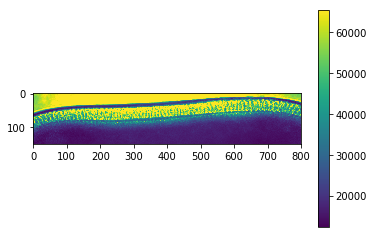

In [14]:
ut.imshow(hst[0,350:500,100:900])

# Segmentation to remove background

In [17]:
fhst = img_as_float(hst)

In [19]:
test = fhst[0,350:500,100:900]

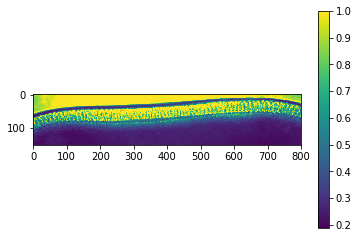

In [20]:
ut.imshow(test)

In [27]:
from scipy.ndimage import gaussian_filter

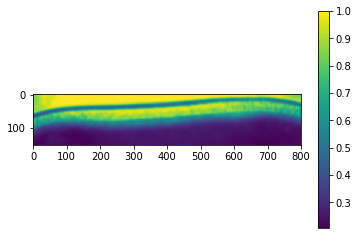

In [31]:
gaus = gaussian_filter(test,4)
ut.imshow(gaus)

In [22]:
from skimage.feature import canny

In [32]:
edges = canny(gaus)
type(edges)

numpy.ndarray

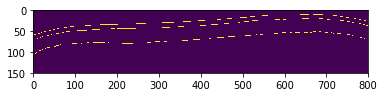

In [33]:
plt.imshow(edges)

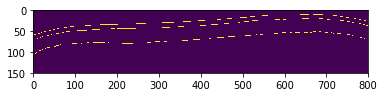

In [34]:
from scipy import ndimage as ndi
fill = ndi.binary_fill_holes(edges)
plt.imshow(fill)

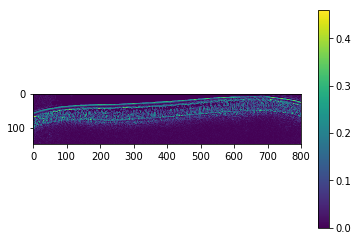

In [37]:
from skimage.filters import sobel
elevation_map = sobel(test)
ut.imshow(elevation_map)

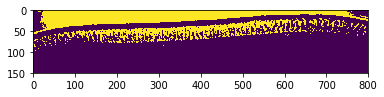

In [38]:
markers = np.zeros_like(test)
markers[test<0.1] = 1
markers[test>0.9] = 2
plt.imshow(markers)

In [39]:
from skimage.morphology import watershed

/Users/Morgan/anaconda3/lib/python3.7/site-packages/skimage/util/arraycrop.py:175: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = np.array(ar[slices], order=order, copy=True)


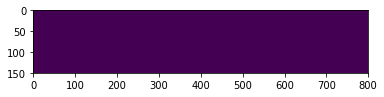

In [41]:
segmentation = watershed(elevation_map,markers)
plt.imshow(segmentation)